In [679]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import numpy as np

In [651]:
baseDeDonnees = pd.read_csv("Donnés\DonnesMeteorologiqueSimple2013-2024.csv", index_col = "DATE")
baseDeDonnees

,STATION,NAME,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDFG,WSFG
DATE,,,,,,,,,,
2013-02-18,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.00,0.0,0.4,NaN,17.0,3.0,NaN,NaN
2013-02-19,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.24,2.4,0.4,NaN,32.0,11.0,NaN,NaN
2013-02-20,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.20,2.0,2.8,NaN,30.0,11.0,NaN,NaN
2013-02-21,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.08,0.8,1.6,NaN,21.0,8.0,NaN,NaN
2013-02-23,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.31,3.1,0.4,NaN,34.0,26.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-04-24,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.50,0.0,NaN,40.0,50.0,30.0,1.0,129.7
2024-04-25,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.00,0.0,NaN,37.0,47.0,27.0,27.0,73.8
2024-04-26,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.00,0.0,NaN,44.0,58.0,30.0,NaN,NaN


In [652]:
baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.006415
SNOW       0.008142
SNWD       0.662226
TAVG       0.191957
TMAX       0.009129
TMIN       0.008142
WDFG       0.292129
WSFG       0.304466
dtype: float64

In [653]:
baseDeDonneesNettoyee = baseDeDonnees[["PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()
baseDeDonneesNettoyee.columns = ["precip","snow","snow_depth","temp_max","temp_min"]
baseDeDonneesNettoyee

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
2013-02-18,0.00,0.0,0.4,17.0,3.0
2013-02-19,0.24,2.4,0.4,32.0,11.0
2013-02-20,0.20,2.0,2.8,30.0,11.0
2013-02-21,0.08,0.8,1.6,21.0,8.0
2013-02-23,0.31,3.1,0.4,34.0,26.0
...,...,...,...,...,...
2024-04-24,0.50,0.0,NaN,50.0,30.0
2024-04-25,0.00,0.0,NaN,47.0,27.0
2024-04-26,0.00,0.0,NaN,58.0,30.0


In [654]:
null_prc = baseDeDonneesNettoyee.apply(pd.isnull).sum()/baseDeDonneesNettoyee.shape[0]
null_prc

precip        0.006415
snow          0.008142
snow_depth    0.662226
temp_max      0.009129
temp_min      0.008142
dtype: float64

In [655]:
del baseDeDonneesNettoyee["snow_depth"]

In [656]:
#Remplissage des trous de donnés
baseDeDonneesNettoyee["snow"] = baseDeDonneesNettoyee["snow"].fillna(0)
baseDeDonneesNettoyee = baseDeDonneesNettoyee.ffill()
baseDeDonneesNettoyee.apply(pd.isnull).sum()/baseDeDonneesNettoyee.shape[0]
baseDeDonneesNettoyee


,precip,snow,temp_max,temp_min
DATE,,,,
2013-02-18,0.00,0.0,17.0,3.0
2013-02-19,0.24,2.4,32.0,11.0
2013-02-20,0.20,2.0,30.0,11.0
2013-02-21,0.08,0.8,21.0,8.0
2013-02-23,0.31,3.1,34.0,26.0
...,...,...,...,...
2024-04-24,0.50,0.0,50.0,30.0
2024-04-25,0.00,0.0,47.0,27.0
2024-04-26,0.00,0.0,58.0,30.0


In [657]:
baseDeDonneesNettoyee.index = pd.to_datetime(baseDeDonneesNettoyee.index)
baseDeDonneesNettoyee.index.month


Index([2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       ...
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype='int32', name='DATE', length=4053)

In [658]:
#Verification probleme data
baseDeDonneesNettoyee.apply(lambda x: (x==9999).sum())

precip      0
snow        0
temp_max    0
temp_min    0
dtype: int64

<Axes: xlabel='DATE'>

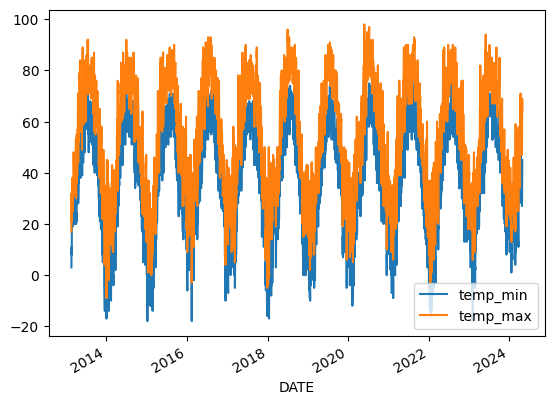

In [659]:
#Analyse pour savoir s'il y a un manque de data.
baseDeDonneesNettoyee[["temp_min","temp_max"]].plot()

In [660]:
#Choisir ce que je veux predire.
baseDeDonneesNettoyee["target"] = baseDeDonneesNettoyee.shift(-1)["temp_max"]
baseDeDonneesNettoyee = baseDeDonneesNettoyee.ffill()

#Creation de mon model de Ml
reg = Ridge(alpha = .1)
predicteur = ["precip","snow","temp_max","temp_min"]
train = baseDeDonneesNettoyee[:"2023-01-31"]
test = baseDeDonneesNettoyee["2023-01-01":]
reg.fit(train[predicteur],train["target"])
predictions = reg.predict(test[predicteur])
baseDeDonneesNettoyee


,precip,snow,temp_max,temp_min,target
DATE,,,,,
2013-02-18,0.00,0.0,17.0,3.0,32.0
2013-02-19,0.24,2.4,32.0,11.0,30.0
2013-02-20,0.20,2.0,30.0,11.0,21.0
2013-02-21,0.08,0.8,21.0,8.0,34.0
2013-02-23,0.31,3.1,34.0,26.0,34.0
...,...,...,...,...,...
2024-04-24,0.50,0.0,50.0,30.0,47.0
2024-04-25,0.00,0.0,47.0,27.0,58.0
2024-04-26,0.00,0.0,58.0,30.0,69.0


<Axes: xlabel='DATE'>

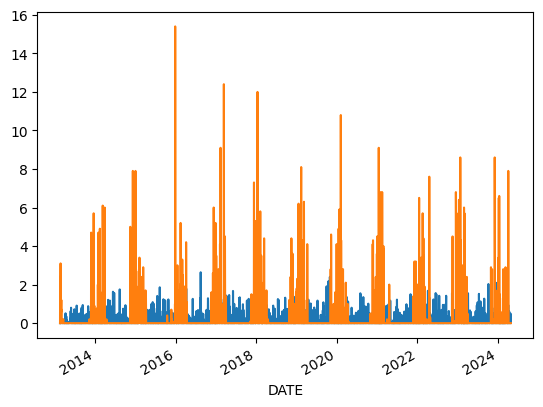

In [661]:
baseDeDonneesNettoyee.index.year.value_counts().sort_index()
baseDeDonneesNettoyee["precip"].plot()
baseDeDonneesNettoyee["snow"].plot()

In [662]:
 #Voir l'erreur de prediction dans le target en question
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["target"],predictions)



5.763712783228168

,Bonne valeur,Valeur predite
DATE,,
2023-01-01,39.0,42.381177
2023-01-02,40.0,42.789820
2023-01-03,37.0,43.999904
2023-01-04,27.0,38.329586
2023-01-05,33.0,31.352662
...,...,...
2024-04-24,47.0,47.650594
2024-04-25,58.0,46.799113
2024-04-26,69.0,55.152950


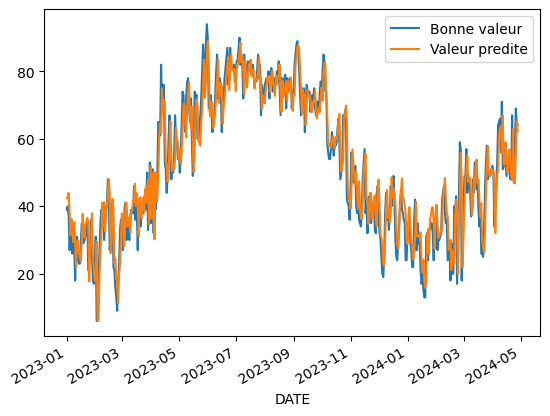

In [663]:
combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)],axis=1)
combined.columns=["Bonne valeur","Valeur predite"]
combined.plot()
reg.coef_
combined

In [664]:
#Creer methode de prediction
def creer_UnePrediction(predicteur,baseDeDonneesNettoyee,reg):
    train = baseDeDonneesNettoyee[:"2023-01-31"]
    test = baseDeDonneesNettoyee["2023-01-01":]
    reg.fit(train[predicteur],train["target"])
    predictions = reg.predict(test[predicteur])
    error = mean_absolute_error(test["target"],predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)],axis=1)
    combined.columns=["Bonne valeur","Valeur predite"]
    return error,combined


In [665]:
#Voir la moyenne de temperature par mois
baseDeDonneesNettoyee["mois_temp_max"] = baseDeDonneesNettoyee["temp_max"].rolling(30).mean()

In [666]:
baseDeDonneesNettoyee

,precip,snow,temp_max,temp_min,target,mois_temp_max
DATE,,,,,,
2013-02-18,0.00,0.0,17.0,3.0,32.0,NaN
2013-02-19,0.24,2.4,32.0,11.0,30.0,NaN
2013-02-20,0.20,2.0,30.0,11.0,21.0,NaN
2013-02-21,0.08,0.8,21.0,8.0,34.0,NaN
2013-02-23,0.31,3.1,34.0,26.0,34.0,NaN
...,...,...,...,...,...,...
2024-04-24,0.50,0.0,50.0,30.0,47.0,53.0
2024-04-25,0.00,0.0,47.0,27.0,58.0,52.8
2024-04-26,0.00,0.0,58.0,30.0,69.0,52.8


In [667]:
#Ajout colonne comparaison temperature max par mois par rapport a la temperature du jour
baseDeDonneesNettoyee["ratio_mois_jour_tempmax"] = baseDeDonneesNettoyee["mois_temp_max"]/baseDeDonneesNettoyee["temp_max"]
#Ajout colonne comparaison entre la temperature max et min.
baseDeDonneesNettoyee["ratio_max_min"] = baseDeDonneesNettoyee["temp_max"]/baseDeDonneesNettoyee["temp_min"]
baseDeDonneesNettoyee

,precip,snow,temp_max,temp_min,target,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
DATE,,,,,,,,
2013-02-18,0.00,0.0,17.0,3.0,32.0,NaN,NaN,5.666667
2013-02-19,0.24,2.4,32.0,11.0,30.0,NaN,NaN,2.909091
2013-02-20,0.20,2.0,30.0,11.0,21.0,NaN,NaN,2.727273
2013-02-21,0.08,0.8,21.0,8.0,34.0,NaN,NaN,2.625000
2013-02-23,0.31,3.1,34.0,26.0,34.0,NaN,NaN,1.307692
...,...,...,...,...,...,...,...,...
2024-04-24,0.50,0.0,50.0,30.0,47.0,53.0,1.060000,1.666667
2024-04-25,0.00,0.0,47.0,27.0,58.0,52.8,1.123404,1.740741
2024-04-26,0.00,0.0,58.0,30.0,69.0,52.8,0.910345,1.933333


In [668]:
predicteur = ["precip","snow","temp_max","temp_min","mois_temp_max","ratio_mois_jour_tempmax","ratio_max_min"]

In [669]:
#Enlever les valeurs NaN causer parce nous n'avons pas les valeurs des 30 jours avant pour pouvoir calculer la moyenne de temp_max pour la colonne mois_temp_max.
baseDeDonneesNettoyee = baseDeDonneesNettoyee.iloc[30:,:].copy()
baseDeDonneesNettoyee
#Transforme nos valeur inf et -inf par NaN pour pouvoir les gerer.
baseDeDonneesNettoyee.replace([np.inf, -np.inf], np.nan, inplace=True)
#Remplacer nos valeur NaN par 0 pour ne pas avoir de manque de donnes.
baseDeDonneesNettoyee = baseDeDonneesNettoyee.fillna(0)


In [670]:
error, combined = creer_UnePrediction(predicteur, baseDeDonneesNettoyee, reg)


baseDeDonneesNettoyee

,precip,snow,temp_max,temp_min,target,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
DATE,,,,,,,,
2013-03-31,0.20,0.0,53.0,32.0,44.0,37.300000,0.703774,1.656250
2013-04-01,0.05,0.0,44.0,22.0,30.0,37.700000,0.856818,2.000000
2013-04-02,0.00,0.0,30.0,20.0,36.0,37.700000,1.256667,1.500000
2013-04-03,0.00,0.0,36.0,24.0,48.0,38.200000,1.061111,1.500000
2013-04-04,0.00,0.0,48.0,24.0,36.0,38.666667,0.805556,2.000000
...,...,...,...,...,...,...,...,...
2024-04-24,0.50,0.0,50.0,30.0,47.0,53.000000,1.060000,1.666667
2024-04-25,0.00,0.0,47.0,27.0,58.0,52.800000,1.123404,1.740741
2024-04-26,0.00,0.0,58.0,30.0,69.0,52.800000,0.910345,1.933333


In [671]:
error

5.559807844011243

In [672]:
reg.coef_


array([-3.59578975, -0.20622094,  0.61946507,  0.16450303,  0.20754354,
        0.14194726, -0.05788122])

In [673]:
combined["diff"] = (combined["Bonne valeur"] - combined["Valeur predite"]).abs()
combined

,Bonne valeur,Valeur predite,diff
DATE,,,
2023-01-01,39.0,39.969399,0.969399
2023-01-02,40.0,40.251545,0.251545
2023-01-03,37.0,41.178021,4.178021
2023-01-04,27.0,36.930479,9.930479
2023-01-05,33.0,30.625118,2.374882
...,...,...,...
2024-04-24,47.0,48.720799,1.720799
2024-04-25,58.0,48.129994,9.870006
2024-04-26,69.0,55.396228,13.603772


In [674]:
combined.sort_values("diff",ascending=False).head()
baseDeDonneesNettoyee

,precip,snow,temp_max,temp_min,target,mois_temp_max,ratio_mois_jour_tempmax,ratio_max_min
DATE,,,,,,,,
2013-03-31,0.20,0.0,53.0,32.0,44.0,37.300000,0.703774,1.656250
2013-04-01,0.05,0.0,44.0,22.0,30.0,37.700000,0.856818,2.000000
2013-04-02,0.00,0.0,30.0,20.0,36.0,37.700000,1.256667,1.500000
2013-04-03,0.00,0.0,36.0,24.0,48.0,38.200000,1.061111,1.500000
2013-04-04,0.00,0.0,48.0,24.0,36.0,38.666667,0.805556,2.000000
...,...,...,...,...,...,...,...,...
2024-04-24,0.50,0.0,50.0,30.0,47.0,53.000000,1.060000,1.666667
2024-04-25,0.00,0.0,47.0,27.0,58.0,52.800000,1.123404,1.740741
2024-04-26,0.00,0.0,58.0,30.0,69.0,52.800000,0.910345,1.933333


In [678]:
#a comprendre
dernieres_donnees = baseDeDonneesNettoyee.iloc[-1][predicteur].values.reshape(1, -1)

# Faire la prédiction pour demain
prediction_demain = reg.predict(dernieres_donnees)[0]

# Obtenir la date de demain
date_demain = baseDeDonneesNettoyee.index[-1] + pd.Timedelta(days=1)

# Afficher la prédiction
print(f"Prédiction pour {date_demain.date()} : {(prediction_demain-32)/(9/5):.2f}°C")

Prédiction pour 2024-04-29 : 16.00°C


C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
